<a href="https://colab.research.google.com/github/ishaed/DL_ABC/blob/master/uta_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import math

def simpleFunction(x):
	val=x*(x-1)*(x+1)
	return val

In [10]:
import numpy as np
range_x = [-2,2]

X = np.linspace(range_x[0],range_x[1],10000)
y = simpleFunction(X)

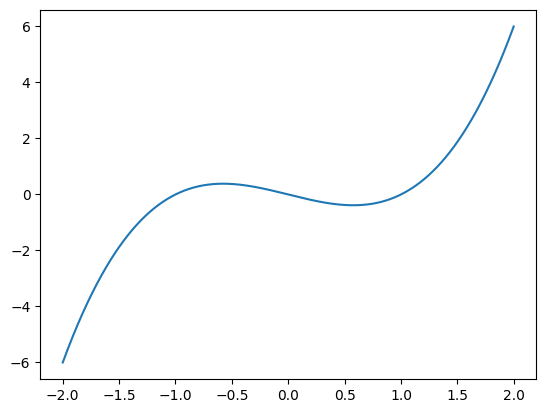

In [11]:
import matplotlib.pyplot as plt
plt.plot(X, y)

In [12]:
import numpy as np

import matplotlib
from matplotlib import pyplot as plt

import torch
print("INFO: pytorch version:", torch.__version__)

# loading device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("INFO: current device :", device)

INFO: pytorch version: 2.0.1+cu118
INFO: current device : cuda:0


In [13]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

x_train = torch.tensor(X, device=device, dtype=torch.float32)
y_train = torch.tensor(y, device=device, dtype=torch.float32)

dataset = TensorDataset(x_train.unsqueeze(1), y_train.unsqueeze(1))

mini_batch=1000

dataloader = DataLoader(dataset, batch_size=mini_batch, shuffle=True)


In [14]:
model_mlp = torch.nn.Sequential(
    torch.nn.Linear(1, 6),
    torch.nn.ReLU(),
    torch.nn.Linear(6, 3),
    torch.nn.ReLU(),
    torch.nn.Linear(3, 2),
    torch.nn.ReLU(),
    torch.nn.Linear(2, 1),
).to(device)

def mse_loss(x, y):
    square_error = (model_mlp(x) - y)**2
    return square_error.mean()

optimizer = torch.optim.Adam(
    model_mlp.parameters(),
    lr=0.001
)

In [15]:
nb_epochs = 1000

# best loss value
loss_best = np.inf

path_temp = "saved_wgt"

for epoch in range(nb_epochs + 1):
    for batch_idx, samples in enumerate(dataloader):
        X_train, Y_train = samples

        # cost 계산
        cost = mse_loss(X_train, Y_train)

        # backpropagation 계산
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        if loss_best > cost:
          loss_best = cost
          torch.save(model_mlp.state_dict(), path_temp)

    if (epoch %100 ==0): print('- Epoch {:1d}, Cost: {:.6f}'.format(epoch, loss_best.item()))

- Epoch 0, Cost: 3.732225
- Epoch 100, Cost: 0.850905
- Epoch 200, Cost: 0.393560
- Epoch 300, Cost: 0.192103
- Epoch 400, Cost: 0.097618
- Epoch 500, Cost: 0.046950
- Epoch 600, Cost: 0.021185
- Epoch 700, Cost: 0.008639
- Epoch 800, Cost: 0.003625
- Epoch 900, Cost: 0.002332
- Epoch 1000, Cost: 0.001948


(-6.0, 6.0)

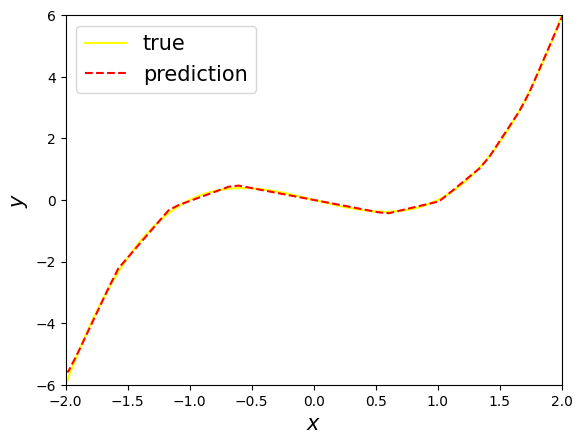

In [16]:
tensor_x_test = torch.linspace(-4.,4.,100,device=device)[:,None]
arr_y_predict = model_mlp(tensor_x_test).detach().cpu().numpy()[:,0]

plt.plot(
    X,
    y,
    label="true",
    color="yellow"
)
plt.plot(
    #arr_x,
    tensor_x_test.detach().cpu().numpy(),
    arr_y_predict,
    "--",
    label="prediction",
    color="red",
)
plt.gca().legend(fontsize=15)
plt.gca().set_xlabel("$x$", fontsize=15)
plt.gca().set_ylabel("$y$", fontsize=15)
plt.gca().set_xlim([-2,2])
plt.gca().set_ylim([-6,6])